In [1]:
%pylab inline
import visitviewer
import glob

Populating the interactive namespace from numpy and matplotlib
**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-034 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-036
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


# JWST Visit Viewer

* [Introduction](#Introduction)
* [Usage from Python](#Usage-from-Python)
* [Command line usage](#Command-line-usage)

## Introduction

`visitviewer` is a tool to display and visualize the pointings for JWST visit files, such as are produced by OPGS based on APT files for upload to the observatory, where they will be used by the OSS Executive to orchestrate observations. 

The main point of this tool is to make it easy to visualize where in the sky a given visit will be pointed, the observatory attitude with respect to the sun and the field of regard constraints, and which detector(s) will be used to take data. 

This tool works by: 
 - Parsing the visit file for relevant information
 - Retrieving a 2MASS K image from Vizier. (This is cached for efficient reuse if you replot a given visit again)
 - And making some plots.



<font color='red'>**Caveats and cautions:** This is an unofficial tool on a best-effort basis, and may not yet strictly agree with PPS and OTB. In particular, a difference in the assumed ephemeris for JWST can result in inconsistencies in field of regard calculations. If this tool warns that a given visit may be out of the field of regard, take that with a grain of salt for now, and check with the real PPS experts for a more authoritative answer.</font>

## Usage from Python 
 
 Usage is relatively simple:

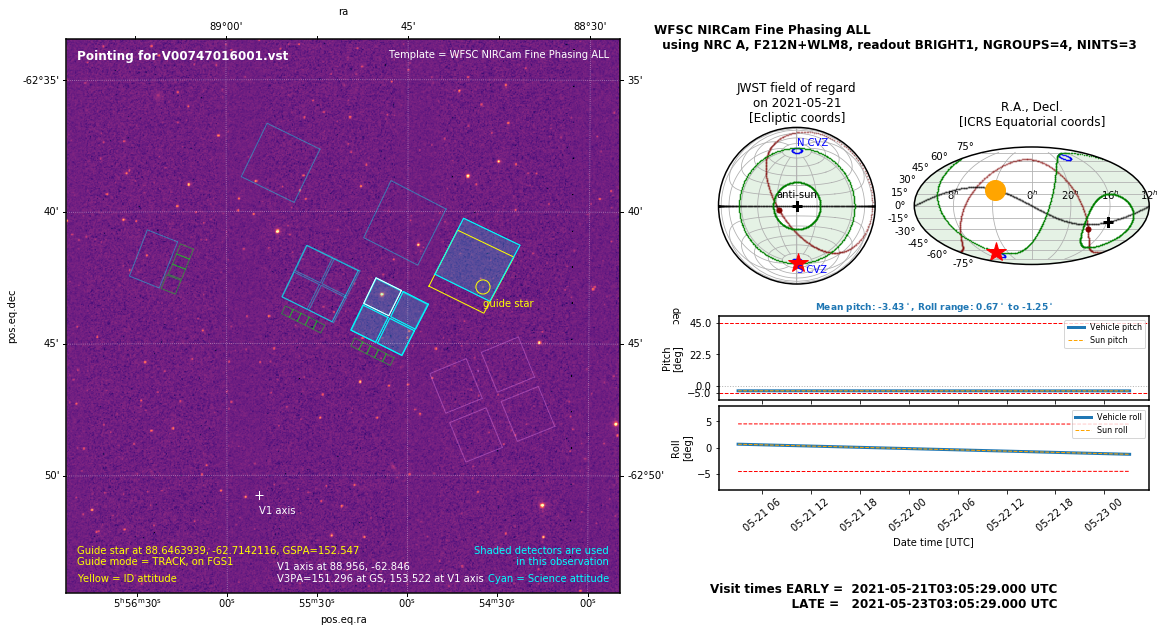

In [2]:
visitviewer.view("../examples/V00747016001.vst")

You can save the results to a PDF if desired:

File saved to V00741066001_view.pdf


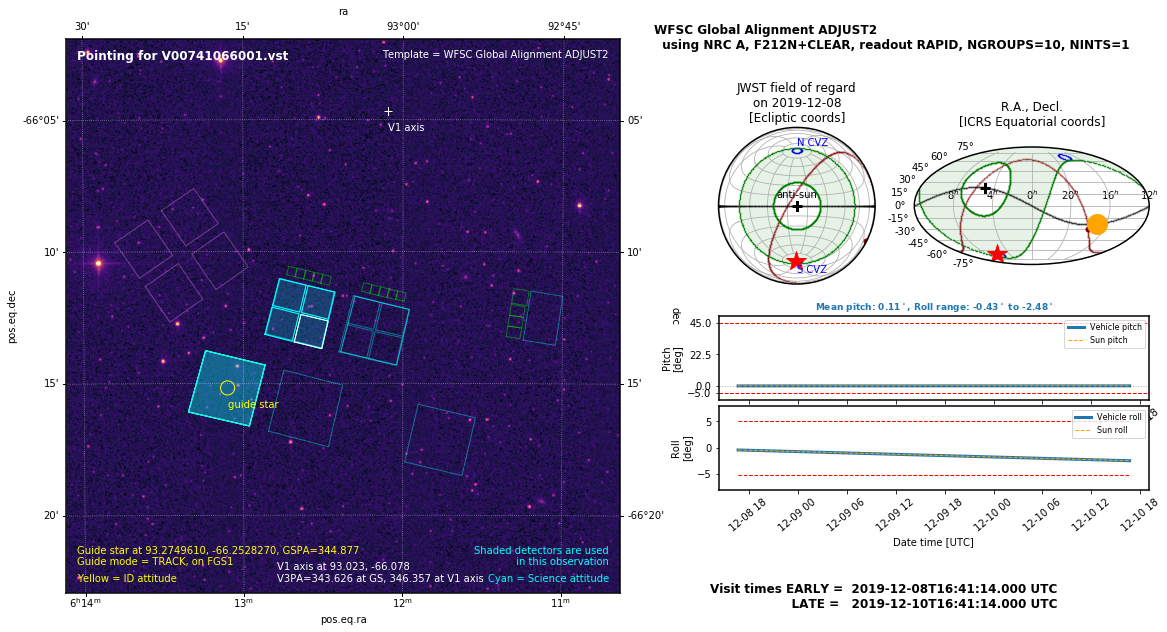

In [3]:
visitviewer.view("../examples/V00741066001.vst", save=True)

## Command line usage

You can also run this directly from the Unix/Linux/macOS command line. The output will be saved to a PDF directly in this case.

```

> visitviewer examples/V00744014001.vst
File saved to V00744014001_view.pdf

```

You can provide multiple visit filenames or use a wildcard, and it'll process all of them:

```

> visitviewer V007540*001.vst -n
File saved to V00754013001_view.pdf
File saved to V00754014001_view.pdf
File saved to V00754015001_view.pdf
File saved to V00754016001_view.pdf
File saved to V00754017001_view.pdf
```

When processing multiple visit files, you can optionally output them all to a single multi-page PDF with the  `--multipage` or `-m` option:

```
> visitviewer V00747*001.vst -n --multipage
Output saved to V00747012001_to_V00747017001_view.pdf
```

## Options for Position Angle Handling

The interpretation of the GSPA parameter varies depending on PPS version (and spacecraft attitude control software coordinate transform matrix). For earlier versions, the GSPA is the V3PA at the guide star; for later versions it is the FGS1 ideal coordinate system Y axis PA at the guide star, which is slightly rotated. 

There is a parameter option `no_gspa_yoffset` (or `--no_gspa_yoffset` for the command line version, or just `-n` for short) to select how the GSPA parameter is interpreted.

For LRE3 or LRE4, using PPS version 14.14.1, you should set this parameter True. This will result in plots with precisely consistent orientation to PPS' expectations. When this option is set, the plots will be annotated with a label at lower left showing this is the case.


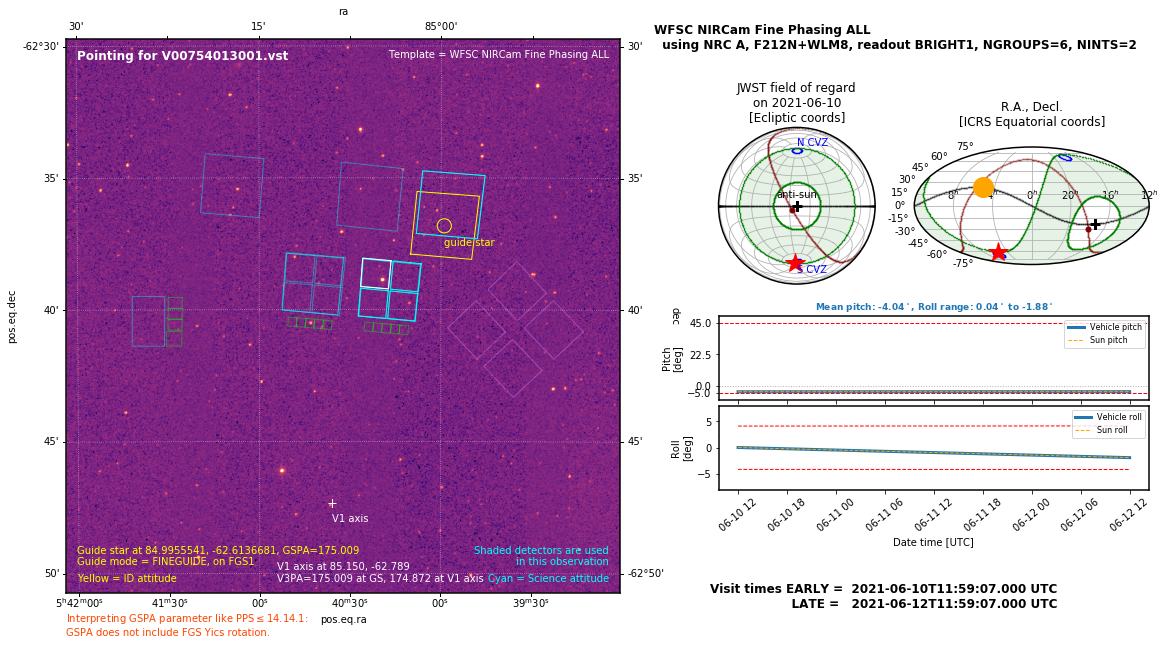

In [5]:
visitviewer.view("../examples/LRE4/V00754013001.vst", no_gspa_yoffset=True)